In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [24]:
corolla = pd.read_csv("./ToyotaCorolla.csv")

In [5]:
corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [6]:
# 데이터의 수와 변수의 수 확인하기
nCar = corolla.shape[0]
nVar = corolla.shape[1]
print(nCar,nVar)

1436 37


## 범주형 변수를 이진형 변수로 변환

In [10]:
# 가변수 생성
corolla.Fuel_Type.unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [8]:

# 3개의 값이 있다. 
# 원 핫 인코딩 필요
# 더미 생성
dummy_p = np.repeat(0,nCar)
dummy_d = np.repeat(0,nCar)
dummy_c = np.repeat(0,nCar)

In [9]:
dummy_p

array([0, 0, 0, ..., 0, 0, 0])

In [13]:
p_idx = np.array(corolla.Fuel_Type == 'Petrol')
d_idx = np.array(corolla.Fuel_Type == 'Diesel')
c_idx = np.array(corolla.Fuel_Type == 'CNG')

In [14]:
dummy_p[p_idx]=1
dummy_d[d_idx]=1
dummy_c[c_idx]=1

## 불필요한 변수 제거 및 가변수 추가

In [15]:
Fuel = pd.DataFrame({'Petrol':dummy_p,'Diesel':dummy_d, 'CNG':dummy_c})

In [27]:
corolla_ = corolla.drop(['Id','Model','Fuel_Type'],axis=1, inplace=False)
mir_data = pd.concat((corolla_,Fuel),1)
mir_data.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,0,1,0,1,0,0,0,0,1,0


In [28]:
# bias추가
mir_data_con = sm.add_constant(mir_data,has_constant='add')
mir_data_con.head()

C:\Users\jihun\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,1.0,13500,23,10,2002,46986,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
1,1.0,13750,23,10,2002,72937,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
2,1.0,13950,24,9,2002,41711,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
3,1.0,14950,26,7,2002,48000,90,0,0,2000,...,0,0,0,1,0,0,0,0,1,0
4,1.0,13750,30,3,2002,38500,90,0,0,2000,...,0,1,0,1,0,0,0,0,1,0


In [57]:
# price를 제외하고 가져오기
feature_columns = list(mir_data_con.columns.difference(['Price']))
feature_columns

['ABS',
 'Age_08_04',
 'Airbag_1',
 'Airbag_2',
 'Airco',
 'Automatic',
 'Automatic_airco',
 'BOVAG_Guarantee',
 'Backseat_Divider',
 'Boardcomputer',
 'CD_Player',
 'CNG',
 'Central_Lock',
 'Cylinders',
 'Diesel',
 'Doors',
 'Gears',
 'Guarantee_Period',
 'HP',
 'KM',
 'Met_Color',
 'Metallic_Rim',
 'Mfg_Month',
 'Mfg_Year',
 'Mfr_Guarantee',
 'Mistlamps',
 'Petrol',
 'Power_Steering',
 'Powered_Windows',
 'Quarterly_Tax',
 'Radio',
 'Radio_cassette',
 'Sport_Model',
 'Tow_Bar',
 'Weight',
 'cc',
 'const']

In [34]:
# x,y를 분리하기 / 학습데이터와 테스트데이터를 분리하기
x = mir_data_con[feature_columns]
y = mir_data_con.Price

train_x, test_x, train_y, test_y = train_test_split(x,y,train_size=0.7, test_size=0.3)
print(train_x.shape,test_x.shape)

(1005, 37) (431, 37)


In [35]:
# OLS
full_model = sm.OLS(train_y,train_x)
fitted_full_model = full_model.fit()

In [36]:
fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     284.1
Date:                Mon, 23 Dec 2019   Prob (F-statistic):               0.00
Time:                        13:43:37   Log-Likelihood:                -8449.3
No. Observations:                1005   AIC:                         1.697e+04
Df Residuals:                     971   BIC:                         1.713e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -277.9124    139.467     -1.993      0.047    -551.604      -4.221
Age_08_04         -111.7220      4.087    -27.338      0.000    -119.742    -103.702
Airbag_1          -345.5606    264.363     -1.307      0.191    -864.349     173.228
Airbag_2           -18.4442    138.427     -0.133      0.894    -290.096     253.207
Airco              250.8666     94.590      2.652      0.008      65.242     436.491
Automatic          405.7265    163.146      2.487      0.013      85.567     725.887
Automatic_airco   2363.7603    205.910     11.480      0.000    1959.680    2767.841
BOVAG_Guarantee    504.0829    131.662      3.829      0.000     245.707     762.459
Backseat_Divider  -135.4126    139.751     -0.969      0.333    -409.661     138.836
Boardcomputer     -194.3659    122.121     -1.592      0.112    -434.018      45.286
CD_Player          234.6571    106.403      2.205      0.028      25.850     443.464
CNG              -1976.9866    294.772     -6.707      0.000   -2555.450   -1398.523
Central_Lock        49.3974    147.289      0.335      0.737    -239.644     338.439
Cylinders           -0.0291      0.002    -11.792      0.000      -0.034      -0.024
Diesel            1480.8609    333.497      4.440      0.000     826.403    2135.319
Doors               26.6140     42.360      0.628      0.530     -56.514     109.742
Gears              -56.8005    215.242     -0.264      0.792    -479.194     365.593
Guarantee_Period    73.6722     14.423      5.108      0.000      45.369     101.975
HP                  46.2934      6.285      7.366      0.000      33.960      58.627
KM                  -0.0164      0.001    -12.261      0.000      -0.019      -0.014
Met_Color          -16.4035     78.683     -0.208      0.835    -170.812     138.005
Metallic_Rim       141.8505    100.428      1.412      0.158     -55.231     338.932
Mfg_Month          -88.7808     10.980     -8.085      0.000    -110.329     -67.233
Mfg_Year             2.1069      0.956      2.205      0.028       0.231       3.982
Mfr_Guarantee      178.4673     78.013      2.288      0.022      25.374     331.560
Mistlamps           28.0831    115.246      0.244      0.808    -198.077     254.243
Petrol             496.1184    259.462      1.912      0.056     -13.052    1005.289
Power_Steering     133.4324    325.883      0.409      0.682    -506.083     772.948
Powered_Windows    303.5940    147.920      2.052      0.040      13.313     593.875
Quarterly_Tax       15.2081      1.999      7.607      0.000      11.285      19.131
Radio              560.7085    657.364      0.853      0.394    -729.309    1850.725
Radio_cassette    -683.0588    657.304     -1.039      0.299   -1972.960     606.842
Sport_Model        266.1451     93.496      2.847      0.005      82.668     449.622
Tow_Bar            -95.

# VIF를 통한 다중공선성 확인

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(mir_data_con.values, i) for i in range(mir_data_con.shape[1])]
vif['Features'] = mir_data_con.columns
vif

# Age_08_04가 다중공선성이 매우 심하지만 pvalue가 매우 적기때문에 변수를 제거하지 않는다
# radio, radio_cassette는 지워보자

C:\Users\jihun\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\jihun\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,Features
0,0.000000,const
1,10.953474,Price
2,inf,Age_08_04
3,inf,Mfg_Month
4,inf,Mfg_Year
5,2.400334,KM
6,2.621514,HP
7,1.143778,Met_Color
8,1.121303,Automatic
9,1.258641,cc


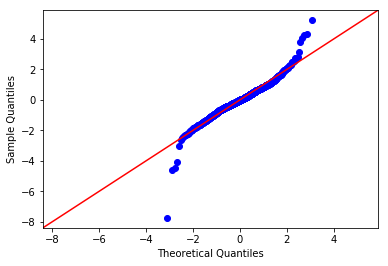

In [46]:
# 학습데이터의 잔차 확인
res = fitted_full_model.resid

# q-q plt  # 정규분포 확인
flg = sm.qqplot(res,fit=True, line='45')

# 어느정도 선형회귀가 맞는구나를 확인 할 수 있다.

Text(0, 0.5, 'Residual')

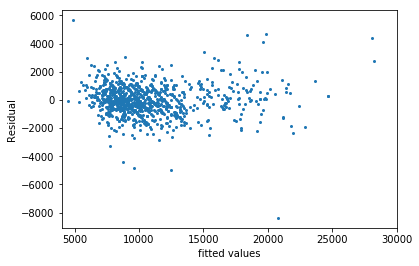

In [49]:
# residual pattern 확인
pred_y = fitted_full_model.predict(train_x)
import matplotlib.pyplot as plt
flg = plt.scatter(pred_y,res,s=4)
plt.xlim(4000,30000)
plt.xlabel('fitted values')
plt.ylabel('Residual')

In [50]:
# 검증 데이터에 대한 예측
pred_y2 = fitted_full_model.predict(test_x)

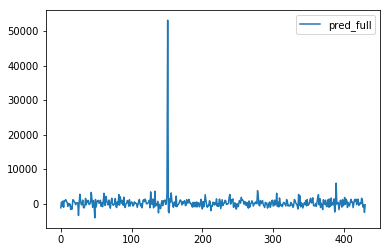

In [51]:
# 잔차 plot
plt.plot(np.array(test_y-pred_y2),label='pred_full')
plt.legend()
plt.show()
# 튄 값 말고 잘나온 예측값이다 라고 볼수있다.

In [52]:
from sklearn.metrics import mean_squared_error

In [54]:
# MSE 성능
mean_squared_error(y_true = test_y, y_pred=pred_y2)

7705584.175553482

# 위에서 radio변수 를 제거한 모델과의 비교
# 변수선택법


In [56]:
def processSubset(x,y,feature_set):
    model = sm.OLS(y,x[list(feature_set)])
    regr = model.fit()
    AIC = regr.aic
    return {"model":regr, "AIC":AIC}

print(processSubset(x=train_x, y =train_y, feature_set = feature_columns[0:5]))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000271F6D2A828>, 'AIC': 19093.380574856317}


In [64]:
# 모든 조합을 고려해서 가장 좋은 모델을 찾는 과정
import time
import itertools
def getBest(x,y,k):
    tic = time.time()
    results = []
    for combo in itertools.combinations(x.columns.difference(['const']),k):
        combo = (list(combo)+['const'])
        
        results.append(processSubset(x,y,feature_set=combo))
    models = pd.DataFrame(results)
    # 가장 낮은 AIC를 가지는 모델 선택 및 저장
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time()
    print("Processed ",models.shape[0], "models on",k,"predictors in", (toc-tic), "seconds ")
    return best_model

print(getBest(x=train_x,y=train_y,k=2))

Processed  630 models on 2 predictors in 2.8737220764160156 seconds 
AIC                                                17571.7
model    <statsmodels.regression.linear_model.Regressio...
Name: 211, dtype: object


C:\Users\jihun\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  del sys.path[0]


In [65]:
# 변수 선택에 따른 학습시간과 저장
models = pd.DataFrame(columns=['AIC','model'])
tic = time.time()
for i in range(1,4):
    models.loc[i]=getBest(x=train_x, y=train_y, k=i)
    
toc = time.time()
print("Total elapsed time: ", (toc-tic), "seconds ")
    

C:\Users\jihun\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  del sys.path[0]


Processed  36 models on 1 predictors in 0.1858973503112793 seconds 
Processed  630 models on 2 predictors in 2.7776918411254883 seconds 
Processed  7140 models on 3 predictors in 34.26260948181152 seconds 
Total elapsed time:  37.641196727752686 seconds 


In [66]:
models

,AIC,model
1,17824.623399,<statsmodels.regression.linear_model.Regressio...
2,17571.731856,<statsmodels.regression.linear_model.Regressio...
3,17387.490959,<statsmodels.regression.linear_model.Regressio...


In [67]:
# 3의 변수를 넣었을 때 AIC가 제일 작으므로
models.loc[3,'model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     1869.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):               0.00
Time:                        16:26:55   Log-Likelihood:                -8689.7
No. Observations:                1005   AIC:                         1.739e+04
Df Residuals:                    1001   BIC:                         1.741e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
KM            -0.0247      0.001    -17.755      0.000      -0.027      -0.022
Mfg_Year    1430.4933     38.807     36.861      0.000    1354.340    1506.646
Weight        19.6340      0.989     19.850      0.000      17.693      21.575
const      -2.869e+06   7.71e+04    -37.218      0.000   -3.02e+06   -2.72e+06
==============================================================================
Omnibus:                      237.143   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2828.752
Skew:                          -0.721   Prob(JB):                         0.00
Kurtosis:                      11.091   Cond. No.                     1.39e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 변수선택법, 전진선택법
모든 변수에 대해서 학습을 돌리면 너무 오래걸리므로 다 돌려볼수는 없다

In [81]:
###### 전진선택법 ( step=1 )
# predictor : 현재 선택되어 있는 변수
def forward(x,y,predictors):
    # 데이터 변수들이 미리정의된 predictor에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in x.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(x=x, y=y, feature_set = predictors+[p]+['const']))
    #데이터 프레임으로 변환
    models = pd.DataFrame(results)
    
    #AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] #index
    toc = time.time()
    print("Processed ",models.shape[0], "models on",len(predictors)+1,"predictors in", (toc-tic), "seconds ")
    print("Selected predictors: ",best_model['model'].model.exog_names, ' AIC: ',best_model[0])
    return best_model

In [84]:
### 전진선택법 모델
def forward_model(x,y):
    Fmodels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    # 미리 정의된 데이터 변수
    predictors = []
    # 변수 1~10개 : 0-9 ->1-10
    for i in range(1,len(x.columns.difference(['const'])) + 1):
        Forward_result = forward(x=x,y=y,predictors=predictors)
        if i > 1:
            if Forward_result['AIC']>Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]['model'].model.exog_names
        Fmodel_before = Fmodels.loc[i]['AIC']
        predictors = [k for k in predictors if k!='const']
    toc=time.time()
    print('Total elapsed time: ', (toc-tic), 'seconds ')
    
    return (Fmodels['model'][len(Fmodels['model'])])

In [85]:
Forward_best_model = forward_model(x=train_x, y=train_y)

C:\Users\jihun\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  


Processed  36 models on 1 predictors in 0.1832282543182373 seconds 
Selected predictors:  ['Mfg_Year', 'const']  AIC:  17824.623399381973
Processed  35 models on 2 predictors in 0.15977931022644043 seconds 
Selected predictors:  ['Mfg_Year', 'Automatic_airco', 'const']  AIC:  17571.73185570471
Processed  34 models on 3 predictors in 0.14540696144104004 seconds 
Selected predictors:  ['Mfg_Year', 'Automatic_airco', 'KM', 'const']  AIC:  17457.985972019895
Processed  33 models on 4 predictors in 0.11384248733520508 seconds 
Selected predictors:  ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'const']  AIC:  17210.692440840096
Processed  32 models on 5 predictors in 0.15242552757263184 seconds 
Selected predictors:  ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'const']  AIC:  17155.4696584665
Processed  31 models on 6 predictors in 0.11643600463867188 seconds 
Selected predictors:  ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Powered_Windows', 'const']  AIC:  17126.082

In [87]:
# 모든 변수를 이용해 구하는것보다 훨씬 빠른 시간이 소요됨
Forward_best_model.aic

16950.768133141806

In [88]:
Forward_best_model.summary()

# 굳이 일일이 다 돌려보지 않아도 짧은 시간으로 변수들을 확인할 수 있다.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     428.0
Date:                Mon, 23 Dec 2019   Prob (F-statistic):               0.00
Time:                        16:50:49   Log-Likelihood:                -8452.4
No. Observations:                1005   AIC:                         1.695e+04
Df Residuals:                     982   BIC:                         1.706e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year          1338.2993     47.257     28.320      0.000    1245.564    1431.035
Automatic_airco   2415.6276    192.258     12.565      0.000    2038.345    2792.911
KM                  -0.0164      0.001    -12.459      0.000      -0.019      -0.014
Weight              12.5247      1.332      9.401      0.000       9.910      15.139
HP                  45.9486      5.934      7.743      0.000      34.303      57.594
Powered_Windows    348.9986     87.661      3.981      0.000     176.973     521.024
cc                  -3.7202      0.556     -6.692      0.000      -4.811      -2.629
Quarterly_Tax       14.2318      1.825      7.797      0.000      10.650      17.814
CNG              -6.717e+05   2.36e+04    -28.519      0.000   -7.18e+05   -6.26e+05
Guarantee_Period    77.7749     13.057      5.957      0.000      52.152     103.397
BOVAG_Guarantee    466.1214    127.680      3.651      0.000     215.564     716.679
Airco              261.6637     90.877      2.879      0.004      83.327     440.000
CD_Player          253.1372    102.393      2.472      0.014      52.202     454.072
Sport_Model        236.0364     84.191      2.804      0.005      70.822     401.251
ABS               -274.3464    107.319     -2.556      0.011    -484.948     -63.745
Automatic          406.9534    159.534      2.551      0.011      93.886     720.021
Diesel           -6.683e+05   2.36e+04    -28.343      0.000   -7.15e+05   -6.22e+05
Mfr_Guarantee      171.1559     76.181      2.247      0.025      21.660     320.651
Mfg_Month           21.8039     11.005      1.981      0.048       0.207      43.400
Boardcomputer     -205.1443    116.948     -1.754      0.080    -434.641      24.352
Airbag_1          -347.7057    216.551     -1.606      0.109    -772.662      77.251
Metallic_Rim       138.3022     93.283      1.483      0.139     -44.755     321.360
Petrol           -6.694e+05   2.35e+04    -28.440      0.000   -7.16e+05   -6.23e+05
const            -2.009e+06   7.07e+04    -28.436      0.000   -2.15e+06   -1.87e+06
==============================================================================
Omnibus:                      146.975   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1515.932
Skew:                          -0.270   Prob(JB):                         0.00
Kurtosis:                       8.992   Cond. No.                     5.22e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.28e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# 후진소거법

In [94]:
##### 후진소거법(step=1)

def backward(x,y,predictors):
    tic = time.time()
    results=[]
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(x=x,y=y,feature_set = list(combo)+['const']))
        
    models = pd.DataFrame(results)
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc=time.time()
    print("Processed ",models.shape[0], "models on",len(predictors)-1,"predictors in", (toc-tic), "seconds ")
    print("Selected predictors: ",best_model['model'].model.exog_names, ' AIC: ',best_model[0])
    return best_model

In [95]:
### 후진 소거법 모델

def backward_model(x,y):
    Bmodels = pd.DataFrame(columns=["AIC","model"],index=range(1,len(x.columns)))
    tic = time.time()
    predictors = x.columns.difference(['const'])
    # 전진선택법때와 다르게 predictor조합을 다 채워진 상태에서 시작
    Bmodel_before = processSubset(x,y,predictors)['AIC']
    while(len(predictors) > 1):
        Backward_result = backward(x=train_x, y= train_y, predictors = predictors)
        if Backward_result['AIC'] > Bmodel_before:
            break
        Bmodels.loc[len(predictors)-1] = Backward_result
        predictors = Bmodels.loc[len(predictors)-1]['model'].model.exog_names
        Bmodel_before = Backward_result['AIC']
        predictors = [k for k in predictors if k != 'const']
        
    toc = time.time()
    print("Total elapsed time: ", ( toc-tic), "seconds")
    return (Bmodels['model'].dropna().lioc[0])
    

In [96]:
Backward_best_model = backward_model(x=train_x, y=train_y)

C:\Users\jihun\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  if sys.path[0] == '':


Processed  36 models on 35 predictors in 0.3112599849700928 seconds 
Selected predictors:  ['ABS', 'Age_08_04', 'Airbag_1', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Mistlamps', 'Petrol', 'Power_Steering', 'Powered_Windows', 'Quarterly_Tax', 'Radio', 'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc', 'const']  AIC:  16964.582848408896
Processed  35 models on 34 predictors in 0.2589077949523926 seconds 
Selected predictors:  ['ABS', 'Age_08_04', 'Airbag_1', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Mistlamps', 'Petrol', 'Power_

AttributeError: 'Series' object has no attribute 'lioc'

# 단계적 선택법

In [ ]:
def Stepwise_model(x,y):